## 특성 공학과 규제

훈련 세트보다 테스트 세트의 점수가 높은 문제 발생 (과소적합)
scikit-learn의 PolynomialFeatures 클래스 사용, 다항 회귀에 여러 변수들을 적용해보자
#### 선형 회귀는 특성이 많을 수록 더 좋은 효과를 낸다!!
(다항회귀는 선형 회귀의 한 종류. 입력 특성이 1차가 아닐 때 비선형 회귀)

## 특성 공학
기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [3]:
# 데이터 준비: csv -> pd dataframe -> numpy
# 이전과 다르게 농어의 길이, 높이, 두께를 모두 사용

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')

perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]
       )

In [5]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

In [8]:
# 사이킷런 변환기(transformer) 클래스 사용
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[1, 2]]))

[[1. 1. 2. 1. 2. 4.]]


2개의 특성을 가진 샘플 [2, 3]이 6개의 특성을 가진 샘플로 변환되었다

각 특성을 제곱한 항, 특성끼리 곱한 항을 추가

1은 절편으로 추가된 것 -> 필요없으니 다시 변환

In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [10]:
# 농어 데이터에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [11]:
# 9개 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [13]:
test_poly = poly.transform(test_input)

In [15]:
# 모델 훈련시키고 점수 확인
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [16]:
# 테스트 세트의 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594111


In [17]:
# 특성을 더 추가해서 확인해보기 (3제곱, 4제곱 항까지)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [18]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

특성이 55개 만들어진다

In [19]:
# 점수 확인
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [20]:
print(lr.score(test_poly, test_target))

-144.40579436844948


테스트 세트에 대한 점수가 음수. 훈련세트에 과대적합되어서..

## 규제
머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 하는 것.
특성에 곱해지는 계수의 크기를 작게 만드는 일.

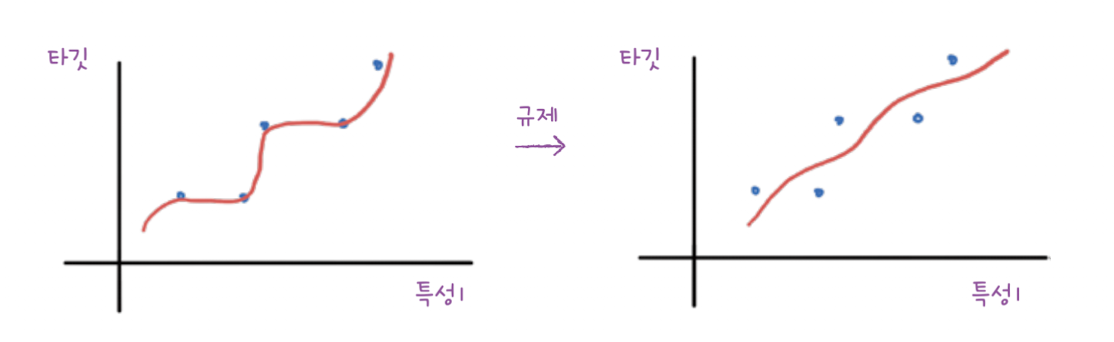

선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 많이 다르면 공정하게 제어되지 않을 것이다.

규제를 적용하기 전 '정규화'를 해야한다

In [22]:
# 평균과 표준편차를 구해서 특성을 표준점수로 바꾸는 클래스 사용
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델
* 릿지(ridge): 계수를 제곱한 값을 기준으로 규제 적용
* 라쏘(Lasso): 계수의 절댓값을 기준으로 규제 적용

(일반적으로 릿지를 좀 더 선호. 라쏘는 계수의 크기를 0으로 만들 수도 있다)

## 릿지 회귀

In [23]:
# 정규화된 데이터로 릿지 모델 훈련, 점수 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [24]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


alpha 매개변수로 규제의 강도를 조절할 수 있다

alpha 값이 크면 규제 강도 세지므로, 계수 값을 더 줄이고 조금 더 과소적합되도록 유도

#### 적합한 alpha 값을 찾는 방법 중 하나: alpha 값에 대한 R^2 그래프 확인

In [25]:
# alpha 값마다 score 결과 저장하는 리스트 생성
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [28]:
# alpha값을 0.001에서 100까지 10배 늘려가면서 릿지 회귀 모델 훈련
alpha_list = [0.001, 0.01, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)

# 훈련/테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

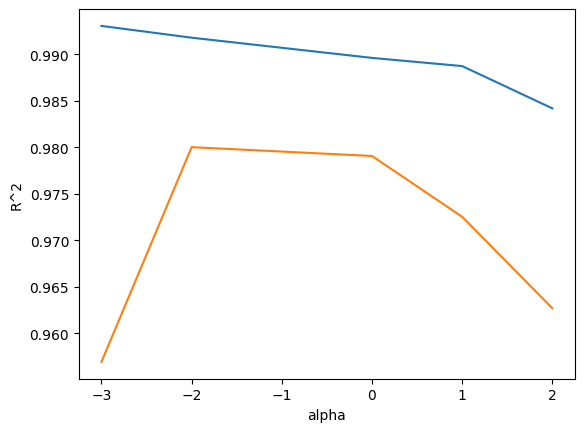

In [29]:
# 그래프 확인 (alpha값 사이 간격 조정을 위해 log 사용)
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

훈련세트(파랑), 테스트세트(주황)

왼쪽은 과대적합, 오른쪽은 과소적합

두 그래프가 가장 가깝고 테스트 세트의 점수가 높은 -1 (=0.1) 일 때가 가장 적절.

In [30]:
# alpha = 0.1로 최종 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘 회귀

In [32]:
# Ridge 클래스를 Lasso 클래스로 바꾸면 된다
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [34]:
# alpha값 바꿔가며 점수 계산
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)

# 훈련/테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행.

지정한 반복 횟수가 부족하면 경고가 뜨기도 한다.

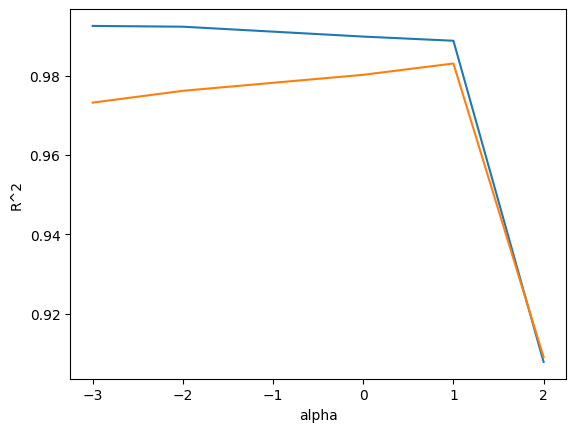

In [35]:
# 그래프로 확인
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽 과대적합, 오른쪽 과소적합

최적의 alpha = 10 (그래프상 1)

In [36]:
# 해당 값으로 다시 모델 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [38]:
# 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다. 이를 확인
print(np.sum(lasso.coef_ == 0))

40


55개 특성 중 40개가 사용되지 않았다.

# 책에 있는 예제를 통해 확인한 결과 릿지 모델이 전반적으로 라쏘 모델에 비해 train과 test set 간 점수 차이가 많이 나는데, 그 이유가 무엇인지 궁금합니다.

# 그리고 위의 결과와는 반대로 현업에서는 오히려 릿지 모델을 선호하는 이유가 무엇인가요?